In [1]:
import pandas as pd
import numpy as np
import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
import math
import seaborn as sns
import itertools

In [2]:
def sens_and_spec(df):
    sensitivity = df['truepos'] / (df['truepos'] + df['falseneg'])
    specificity = df['trueneg'] / (df['trueneg'] + df['falsepos'])

    sensitivity[np.isnan(sensitivity)] = 0
    specificity[np.isnan(specificity)] = 0
    return(sensitivity, specificity)

def KME_mean(df):
    df_mean = df.groupby(['b','d','KME','E','K','n_samples','n_distributions']).mean()
    df_mean.insert(1, 'acc_std', df.groupby(['b','d','KME','E','K','n_samples','n_distributions'])[['score']].std())
    df_mean = df_mean.reset_index()
    return(df_mean)

def wish_mean(df):
    df_mean = df.groupby(['b','d','n_samples']).mean()
    df_mean.insert(2, 'acc_std', df.groupby(['b','d','n_samples'])[['accuracy']].std())
    df_mean = df_mean.reset_index()
    return(df_mean)
    

In [49]:
results_new_1 = pd.read_csv('new/experiment_1_t_sep_impure_train_results.csv')
results_new_3 = pd.read_csv('new/experiment_3_t_sep_impure_train_results.csv')

In [11]:
results_1 = pd.read_csv('experiment_1_t_sep_impure_train_results.csv')
results_3 = pd.read_csv('experiment_3_t_sep_impure_train_results.csv')
results_cross = pd.read_csv('experiment_cross_construct_impure_train_results.csv')
results_intra = pd.read_csv('experiment_intra_construct_impure_train_results.csv')
results_latent = pd.read_csv('experiment_latent_measure_impure_train_results.csv')

In [50]:
results_1_mean_new = KME_mean(results_new_1)
results_3_mean_new = KME_mean(results_new_3)

In [45]:
results_1_mean = KME_mean(results_1)

sensitivity_1, specificity_1 = sens_and_spec(results_1_mean)

results_3_mean = KME_mean(results_3)

sensitivity_3, specificity_3 = sens_and_spec(results_3_mean)

results_cross_mean = KME_mean(results_cross)

sensitivity_cross, specificity_cross = sens_and_spec(results_cross_mean)

results_intra_mean = KME_mean(results_intra)

sensitivity_intra, specificity_intra = sens_and_spec(results_intra_mean)

results_latent_mean = KME_mean(results_latent)

sensitivity_latent, specificity_latent = sens_and_spec(results_latent_mean)

In [39]:
def plot_nsamples_sns(df):
    fig, axs = plt.subplots(2,2, sharex=True, sharey=True, figsize=(8,8))
    #fig.subplots_adjust(hspace = 1.2, wspace=1.2)
    
    palette = sns.color_palette("rocket", 3)

    axs = axs.ravel()

    for n, samples in enumerate(df['n_samples'].unique()):
        new_df = df[df['n_samples'] == samples]
        sens, spec = sens_and_spec(new_df)
        
        axs[n].plot([1, 0], [0, 1], linewidth=0.5)


        sns.scatterplot(x=spec, y=sens, ax=axs[n], palette = palette, s=80, hue=new_df['n_distributions'])
        axs[n].set_title('Sample size {}'.format(samples))
        axs[n].set(xlabel = 'Specificity', ylabel = 'Sensitivity')
        axs[n].set_xlim([-0.05,1.05])
        axs[n].set_ylim([-0.05,1.05])

        plt.xlabel('Specificity')
        plt.ylabel('Sensitivity')
        

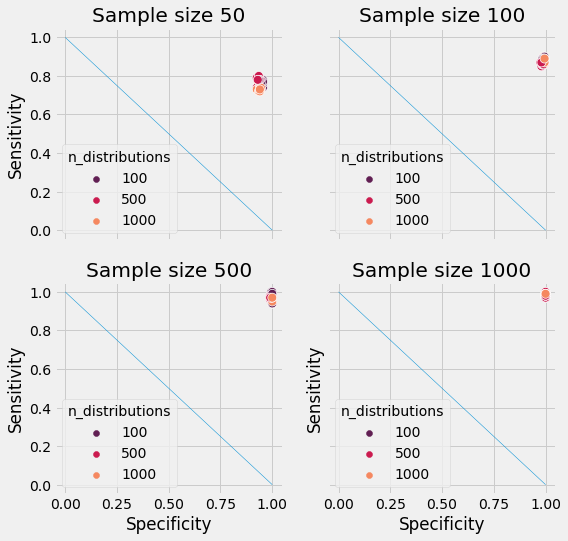

In [40]:
plot_nsamples_sns(results_1_mean)

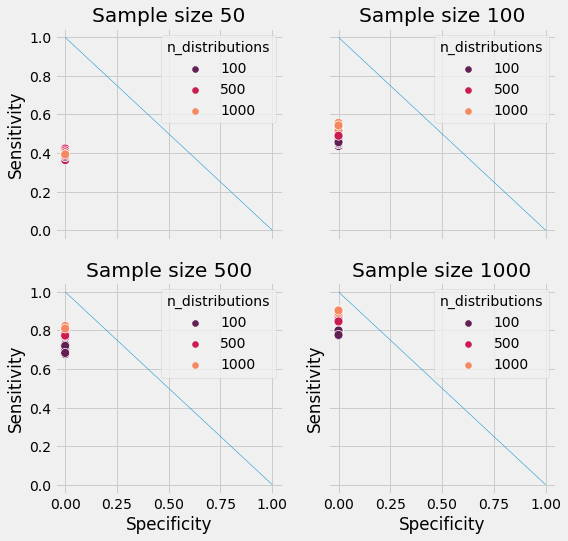

In [41]:
plot_nsamples_sns(results_3_mean)

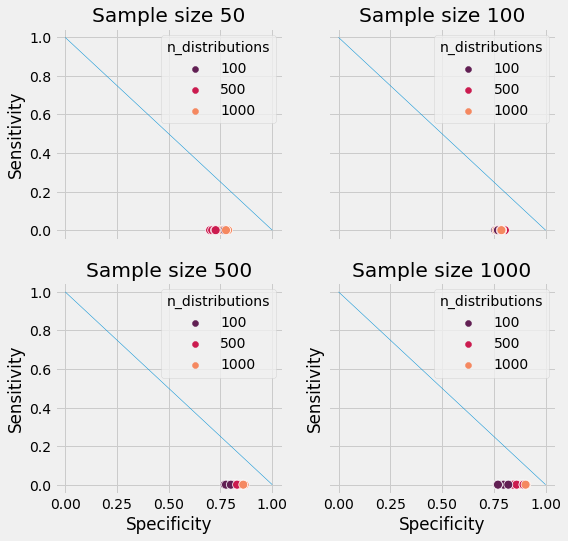

In [42]:
plot_nsamples_sns(results_cross_mean)

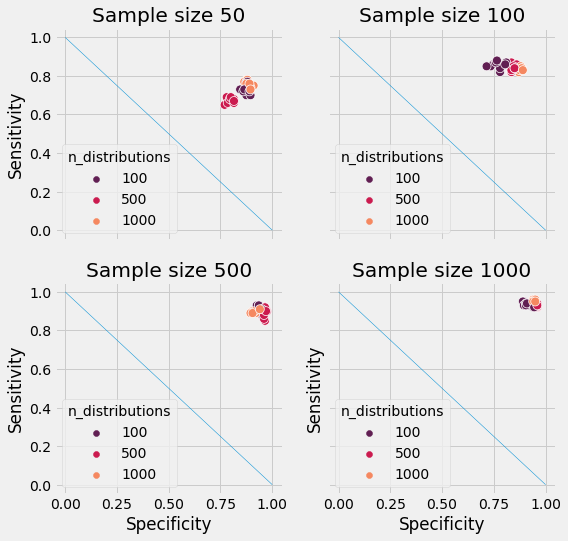

In [43]:
plot_nsamples_sns(results_intra_mean)

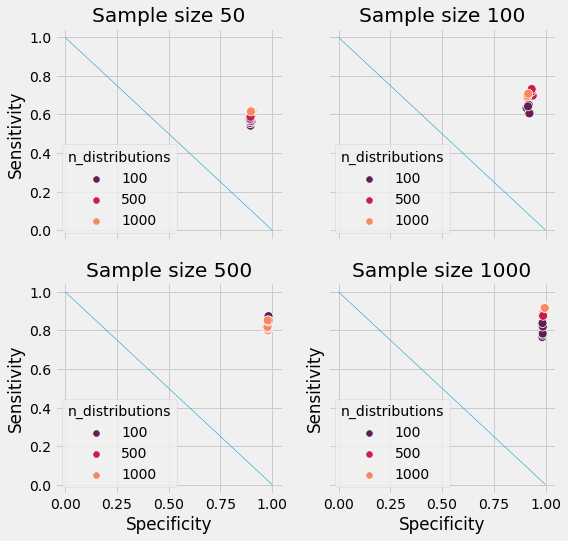

In [44]:
plot_nsamples_sns(results_latent_mean)

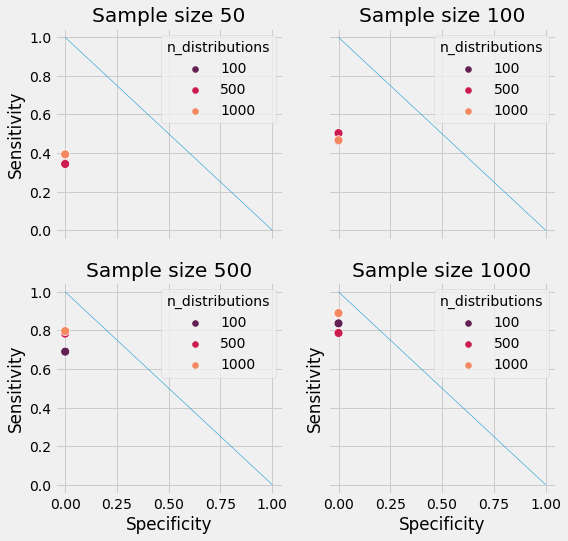

In [52]:
plot_nsamples_sns(results_3_mean_new)